In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<Axes: xlabel='math score', ylabel='Count'>

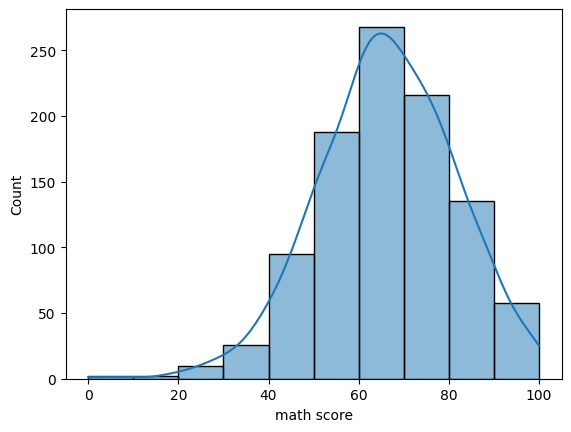

In [6]:
sns.histplot(data['math score'], bins=10,kde=True)

<Axes: xlabel='math score'>

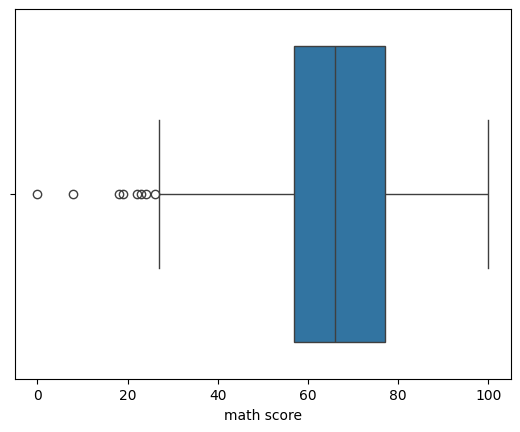

In [7]:
sns.boxplot(data=data, x='math score')

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(data[['math score']])

,copy,True
,with_mean,True
,with_std,True


In [10]:
data['math score'] = scaler.transform(data[['math score']])

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.390024,72,74
1,female,group C,some college,standard,completed,0.192076,90,88
2,female,group B,master's degree,standard,none,1.577711,95,93
3,male,group A,associate's degree,free/reduced,none,-1.259543,57,44
4,male,group C,some college,standard,none,0.653954,78,75


<Axes: xlabel='reading score', ylabel='Count'>

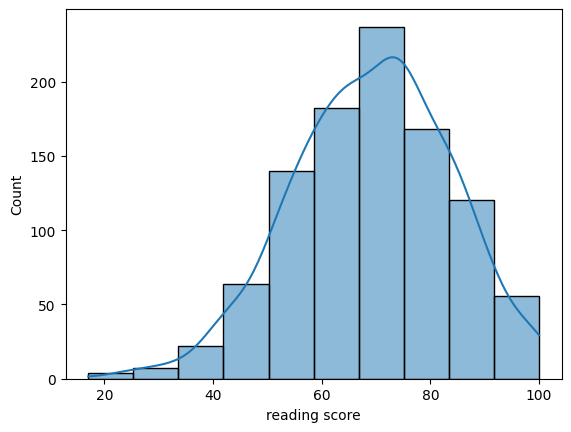

In [11]:
sns.histplot(data['reading score'], bins=10,kde=True)

<Axes: xlabel='reading score'>

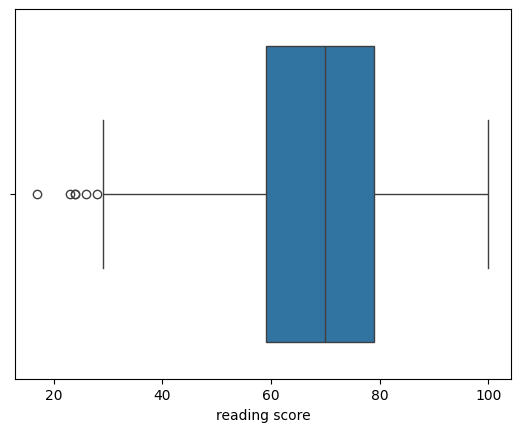

In [12]:
sns.boxplot(data=data, x='reading score')

In [13]:
scaler.fit(data[['reading score']])

,copy,True
,with_mean,True
,with_std,True


In [14]:
data['reading score'] = scaler.transform(data[['reading score']])
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.390024,0.193999,74
1,female,group C,some college,standard,completed,0.192076,1.427476,88
2,female,group B,master's degree,standard,none,1.577711,1.770109,93
3,male,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,44
4,male,group C,some college,standard,none,0.653954,0.605158,75


<Axes: xlabel='writing score', ylabel='Count'>

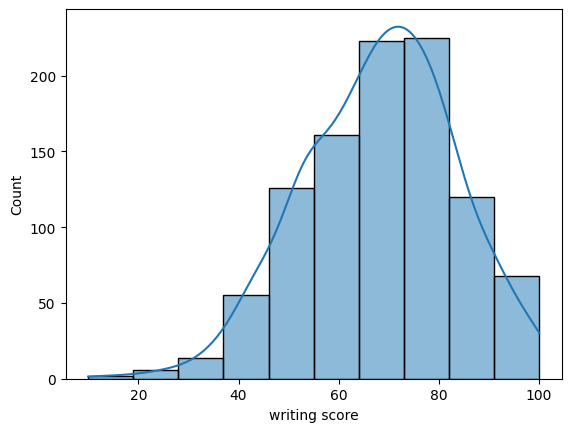

In [15]:
sns.histplot(data['writing score'], bins=10,kde=True)

<Axes: xlabel='writing score'>

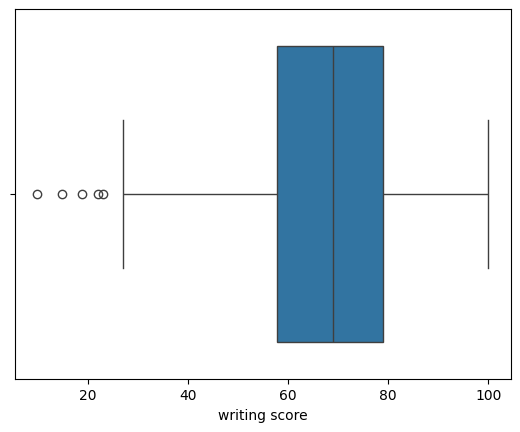

In [16]:
sns.boxplot(data=data, x='writing score')

In [17]:
scaler.fit(data[['writing score']])

,copy,True
,with_mean,True
,with_std,True


In [18]:
data['writing score'] = scaler.transform(data[['writing score']])
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492
1,female,group C,some college,standard,completed,0.192076,1.427476,1.313269
2,female,group B,master's degree,standard,none,1.577711,1.770109,1.642475
3,male,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744
4,male,group C,some college,standard,none,0.653954,0.605158,0.457333


In [19]:
data.describe()

,math score,reading score,writing score
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,8.704149e-17,2.167155e-16,-1.350031e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.360728e+00,-3.574960e+00,-3.822345e+00
25%,-5.997164e-01,-6.968462e-01,-6.784278e-01
50%,-5.872457e-03,5.694554e-02,6.228578e-02
75%,7.199368e-01,6.736842e-01,7.206978e-01
max,2.237538e+00,2.112741e+00,2.103363e+00


In [20]:
print(f"The unique values for 'gender' are {data.gender.unique()}")
print(f"The unique values for 'race/ethnicity' are {data['race/ethnicity'].unique()}")
print(f"The unique values for 'parental level of education' are {data['parental level of education'].unique()}")
print(f"The unique values for 'lunch' are {data.lunch.unique()}")
print(f"The unique values for 'test preparation course' are {data['test preparation course'].unique()}")

The unique values for 'gender' are ['female' 'male']
The unique values for 'race/ethnicity' are ['group B' 'group C' 'group A' 'group D' 'group E']
The unique values for 'parental level of education' are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique values for 'lunch' are ['standard' 'free/reduced']
The unique values for 'test preparation course' are ['none' 'completed']


In [21]:
ordinal_encoder = OrdinalEncoder(categories=[["male","female"]])

ordinal_encoder.fit(data[["gender"]])

display(ordinal_encoder.categories_)

data["gender"] = ordinal_encoder.transform(data[["gender"]])

data

[array(['male', 'female'], dtype=object)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,group B,bachelor's degree,standard,none,0.390024,0.193999,0.391492
1,1.0,group C,some college,standard,completed,0.192076,1.427476,1.313269
2,1.0,group B,master's degree,standard,none,1.577711,1.770109,1.642475
3,0.0,group A,associate's degree,free/reduced,none,-1.259543,-0.833899,-1.583744
4,0.0,group C,some college,standard,none,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...
995,1.0,group E,master's degree,standard,completed,1.445746,2.044215,1.774157
996,0.0,group C,high school,free/reduced,none,-0.269803,-0.970952,-0.859491
997,1.0,group C,high school,free/reduced,completed,-0.467751,0.125472,-0.201079
998,1.0,group D,some college,standard,completed,0.126093,0.605158,0.589015


In [22]:
ordinal_encoder = OrdinalEncoder(categories=[["standard","free/reduced"]])

ordinal_encoder.fit(data[["lunch"]])

display(ordinal_encoder.categories_)

data["lunch"] = ordinal_encoder.transform(data[["lunch"]])

data

[array(['standard', 'free/reduced'], dtype=object)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,group B,bachelor's degree,0.0,none,0.390024,0.193999,0.391492
1,1.0,group C,some college,0.0,completed,0.192076,1.427476,1.313269
2,1.0,group B,master's degree,0.0,none,1.577711,1.770109,1.642475
3,0.0,group A,associate's degree,1.0,none,-1.259543,-0.833899,-1.583744
4,0.0,group C,some college,0.0,none,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...
995,1.0,group E,master's degree,0.0,completed,1.445746,2.044215,1.774157
996,0.0,group C,high school,1.0,none,-0.269803,-0.970952,-0.859491
997,1.0,group C,high school,1.0,completed,-0.467751,0.125472,-0.201079
998,1.0,group D,some college,0.0,completed,0.126093,0.605158,0.589015


In [23]:
ordinal_encoder = OrdinalEncoder(categories=[["none","completed"]])

ordinal_encoder.fit(data[["test preparation course"]])

display(ordinal_encoder.categories_)

data["test preparation course"] = ordinal_encoder.transform(data[["test preparation course"]])

data

[array(['none', 'completed'], dtype=object)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,group B,bachelor's degree,0.0,0.0,0.390024,0.193999,0.391492
1,1.0,group C,some college,0.0,1.0,0.192076,1.427476,1.313269
2,1.0,group B,master's degree,0.0,0.0,1.577711,1.770109,1.642475
3,0.0,group A,associate's degree,1.0,0.0,-1.259543,-0.833899,-1.583744
4,0.0,group C,some college,0.0,0.0,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...
995,1.0,group E,master's degree,0.0,1.0,1.445746,2.044215,1.774157
996,0.0,group C,high school,1.0,0.0,-0.269803,-0.970952,-0.859491
997,1.0,group C,high school,1.0,1.0,-0.467751,0.125472,-0.201079
998,1.0,group D,some college,0.0,1.0,0.126093,0.605158,0.589015


In [24]:
ordinal_encoder = OrdinalEncoder(categories=[["group A", "group B", "group C", "group D", "group E",]])

ordinal_encoder.fit(data[["race/ethnicity"]])

display(ordinal_encoder.categories_)

data["race/ethnicity"] = ordinal_encoder.transform(data[["race/ethnicity"]])

data

[array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,1.0,bachelor's degree,0.0,0.0,0.390024,0.193999,0.391492
1,1.0,2.0,some college,0.0,1.0,0.192076,1.427476,1.313269
2,1.0,1.0,master's degree,0.0,0.0,1.577711,1.770109,1.642475
3,0.0,0.0,associate's degree,1.0,0.0,-1.259543,-0.833899,-1.583744
4,0.0,2.0,some college,0.0,0.0,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...
995,1.0,4.0,master's degree,0.0,1.0,1.445746,2.044215,1.774157
996,0.0,2.0,high school,1.0,0.0,-0.269803,-0.970952,-0.859491
997,1.0,2.0,high school,1.0,1.0,-0.467751,0.125472,-0.201079
998,1.0,3.0,some college,0.0,1.0,0.126093,0.605158,0.589015


In [25]:
ordinal_encoder = OrdinalEncoder(categories=[['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]])

ordinal_encoder.fit(data[["parental level of education"]])

display(ordinal_encoder.categories_)

data["parental level of education"] = ordinal_encoder.transform(data[["parental level of education"]])

data

[array(['some high school', 'high school', 'some college',
        "associate's degree", "bachelor's degree", "master's degree"],
       dtype=object)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,1.0,4.0,0.0,0.0,0.390024,0.193999,0.391492
1,1.0,2.0,2.0,0.0,1.0,0.192076,1.427476,1.313269
2,1.0,1.0,5.0,0.0,0.0,1.577711,1.770109,1.642475
3,0.0,0.0,3.0,1.0,0.0,-1.259543,-0.833899,-1.583744
4,0.0,2.0,2.0,0.0,0.0,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...
995,1.0,4.0,5.0,0.0,1.0,1.445746,2.044215,1.774157
996,0.0,2.0,1.0,1.0,0.0,-0.269803,-0.970952,-0.859491
997,1.0,2.0,1.0,1.0,1.0,-0.467751,0.125472,-0.201079
998,1.0,3.0,2.0,0.0,1.0,0.126093,0.605158,0.589015


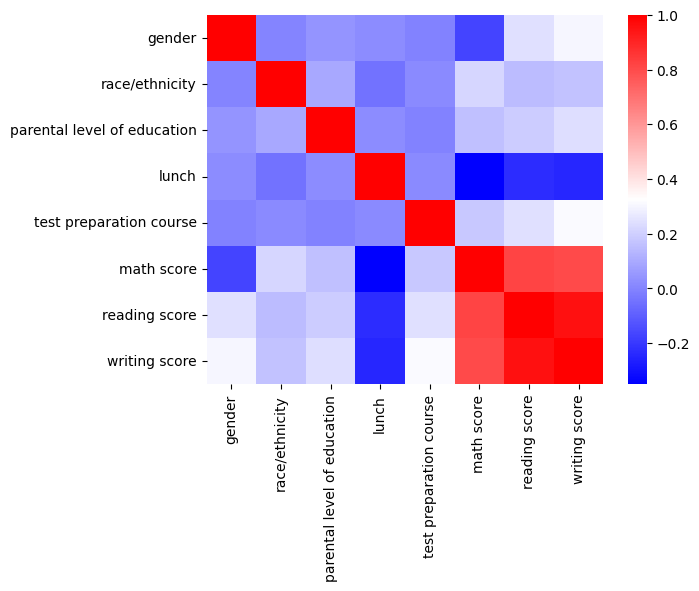

In [26]:
correlation_matrix = data.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [27]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [28]:
# Compute the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Show the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(20)

,feature_1,feature_2,correlation,absolute_correlation
62,writing score,reading score,0.954598,0.954598
55,reading score,writing score,0.954598,0.954598
53,reading score,math score,0.817580,0.817580
46,math score,reading score,0.817580,0.817580
61,writing score,math score,0.802642,0.802642
47,math score,writing score,0.802642,0.802642
43,math score,lunch,-0.350877,0.350877
29,lunch,math score,-0.350877,0.350877
60,writing score,test preparation course,0.312946,0.312946
39,test preparation course,writing score,0.312946,0.312946


In [29]:
# interested in math score and lunch as the highest correlation ouside out colinear test scores
data = data.drop(columns=['writing score', 'reading score'])

In [30]:
data['math_score_binary'] = pd.cut(x=data['math score'],
                                 bins=[data['math score'].min()-1,
                                       data['math score'].mean(),
                                       data['math score'].max()+1],
                                 labels=['pass', 'fail'])

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,math_score_binary
0,1.0,1.0,4.0,0.0,0.0,0.390024,fail
1,1.0,2.0,2.0,0.0,1.0,0.192076,fail
2,1.0,1.0,5.0,0.0,0.0,1.577711,fail
3,0.0,0.0,3.0,1.0,0.0,-1.259543,pass
4,0.0,2.0,2.0,0.0,0.0,0.653954,fail


In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

# -----------------------------
# Encode the target
# -----------------------------
target_encoder = LabelEncoder().fit(data['math_score_binary'])
y = target_encoder.transform(data['math_score_binary'])

# -----------------------------
# Define features
# -----------------------------
X = data.drop(columns=['math score', 'math_score_binary'])

# Identify categorical vs numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# -----------------------------
# Preprocessing: scale numeric, one-hot encode categorical
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

# -----------------------------
# Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Train Logistic Regression
# -----------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# -----------------------------
# Evaluate
# -----------------------------
y_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

Test set accuracy: 0.6700


In [32]:
from sklearn.inspection import permutation_importance

# Perform the permutation
permutation_score = permutation_importance(log_reg, X_train, y_train, n_repeats=10)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending=False)

,feature,score decrease
3,lunch,0.091625
1,race/ethnicity,0.047875
4,test preparation course,0.025875
0,gender,0.017875
2,parental level of education,0.012375


In [33]:
from sklearn.model_selection import cross_val_score

#strongest feature
X = X[["lunch"]]

# Identify categorical vs numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# -----------------------------
# Preprocessing: scale numeric, one-hot encode categorical
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

# -----------------------------
# Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Re-instantiating a Logistic Regression
log_reg = LogisticRegression()

# Average accuracy of the cross-validated model
np.mean(cross_val_score(log_reg, X_train, y_train, cv=10, scoring='accuracy'))

np.float64(0.635)

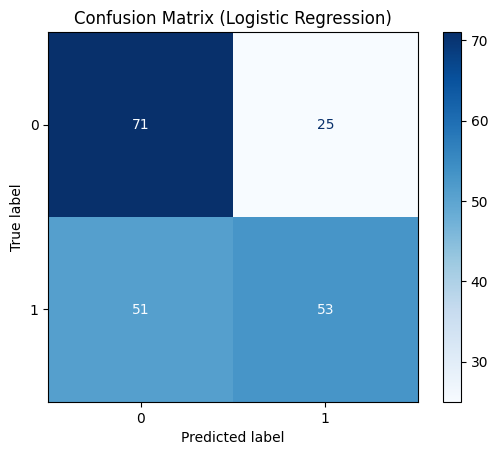

              precision    recall  f1-score   support

           0      0.582     0.740     0.651        96
           1      0.679     0.510     0.582       104

    accuracy                          0.620       200
   macro avg      0.631     0.625     0.617       200
weighted avg      0.633     0.620     0.616       200

Precision: 0.6794871794871795
Recall: 0.5096153846153846


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix (Logistic Regression)")
plt.show()

# --- 2. Precision, Recall, F1 ---
print(classification_report(y_test, y_pred, digits=3))

# If you want to access specific values:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

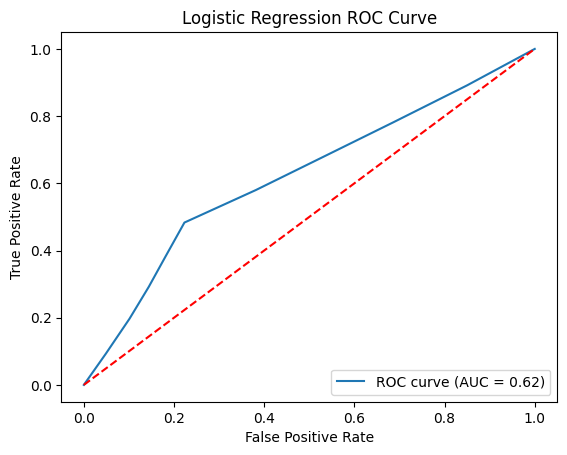

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = cross_val_predict(log_reg, X, y, cv=5, method="predict_proba")[:,1]

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()


Threshold = 0.3
Precision: 0.52, Recall: 1.00

Threshold = 0.5
Precision: 0.68, Recall: 0.51

Threshold = 0.7
Precision: 0.00, Recall: 0.00


/Users/cosimaroughton/.pyenv/versions/3.12.9/envs/education-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


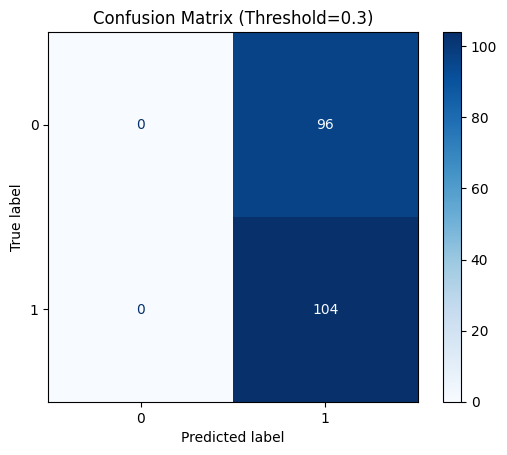

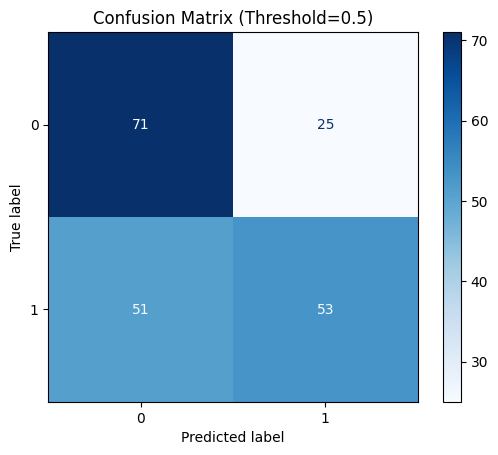

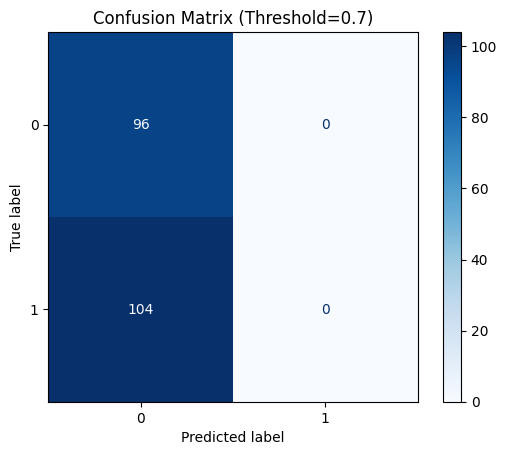

In [36]:
# Predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]

# Try different thresholds
for thresh in [0.3, 0.5, 0.7]:
    print(f"\nThreshold = {thresh}")
    y_pred_thresh = (y_pred_prob >= thresh).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    disp.ax_.set_title(f"Confusion Matrix (Threshold={thresh})")

    # Precision and recall
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

In [37]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,math_score_binary
0,1.0,1.0,4.0,0.0,0.0,0.390024,fail
1,1.0,2.0,2.0,0.0,1.0,0.192076,fail
2,1.0,1.0,5.0,0.0,0.0,1.577711,fail
3,0.0,0.0,3.0,1.0,0.0,-1.259543,pass
4,0.0,2.0,2.0,0.0,0.0,0.653954,fail
...,...,...,...,...,...,...,...
995,1.0,4.0,5.0,0.0,1.0,1.445746,fail
996,0.0,2.0,1.0,1.0,0.0,-0.269803,pass
997,1.0,2.0,1.0,1.0,1.0,-0.467751,pass
998,1.0,3.0,2.0,0.0,1.0,0.126093,fail


In [38]:
data.to_csv('preprocessed_data.csv')